### Import implementation classes

In [2]:
from SchedulingProblem import ProjectSchedulingModel
from ArtificialBeeColony import ArtificialBeeColony, Parameters

### Load problems instances

In [3]:
PATH = "j30.sm/j30"
problems = [ProjectSchedulingModel.from_file(f"{PATH}{i}_{j}.sm") for i in range(1, 49) for j in range(1, 11)]

In [4]:
with open("j30opt.sm", "r") as f:
    lines = f.readlines()

optimal = []
for line in lines[22:502]:
    line = line.split()
    optimal.append(int(line[2]))

for i, best in enumerate(optimal):
    problems[i].best_known = best

### Instantiate ABC optimizer

In [5]:
n = 120
abc = ArtificialBeeColony(psmodel=problems[n])
params = Parameters(N=5*30, limit=30*2, max_trials=30*4*4, mr=0.1, l=10)

### Solve

In [ ]:
best_solution = abc.optimize(params=params, init="mcmc", mode="gs-abc")
history = abc.history
population_diversity = abc.population_divsersity
nscout_bees = abc.nscout_bees
nunique_individuals = abc.nunique_individuals

### Show results

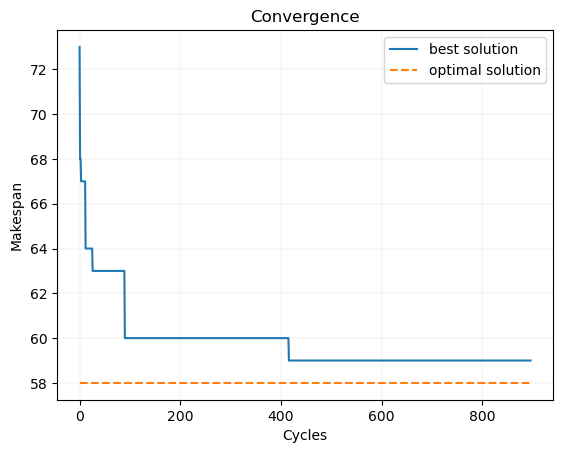

In [8]:
import matplotlib.pyplot as plt

plt.plot([s.get_makespan() for s in history], label='best solution')
plt.plot([optimal[n]] * len(history), linestyle='--', label='optimal solution')

plt.xlabel('Cycles')
plt.ylabel('Makespan')
plt.title('Convergence')
plt.grid(True, which='both', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend()

plt.show()

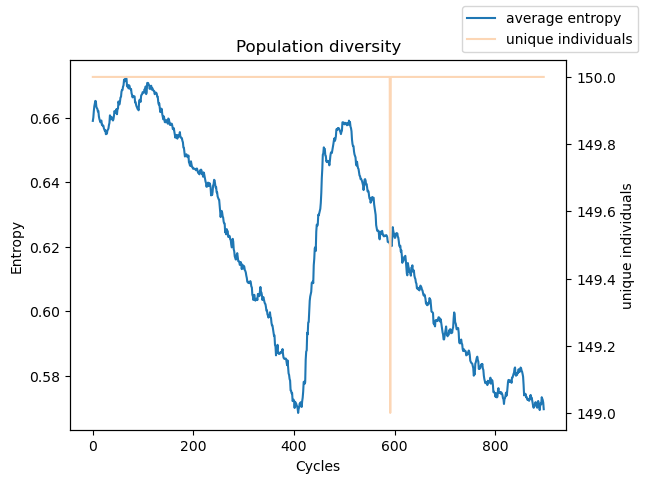

In [9]:
# Sample data
x = [i for i in range(len(population_diversity))]
y1 = population_diversity      # First dataset
y2 = nunique_individuals
# Create a figure and axis
fig, ax1 = plt.subplots()

color1 = '#1f77b4'  # blue from Tableau palette
color2 = "#fcd6b5"  # orange from Tableau palette

# Plot the first dataset
ax1.plot(x, y1, label='average entropy', color=color1)
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(x, y2, color=color2, label='unique individuals')
ax2.set_ylabel('unique individuals')
ax2.tick_params(axis='y')

fig.legend()
# Show the plot
plt.title("Population diversity")
plt.show()


In [10]:
print(best_solution)

Event 0 at time 0, jobs: 1, 3, 4
Event 1 at time 2, jobs: 2, 6
Event 2 at time 4, jobs: 12
Event 3 at time 5, jobs: 7, 11
Event 4 at time 6, jobs: 5
Event 5 at time 8, jobs: 15
Event 6 at time 13, jobs: 18, 14
Event 7 at time 17, jobs: 21
Event 8 at time 18, jobs: 8, 31
Event 9 at time 21, jobs: 24
Event 10 at time 25, jobs: 19
Event 11 at time 27, jobs: 9, 17, 27
Event 12 at time 28, jobs: 10
Event 13 at time 35, jobs: 23
Event 14 at time 36, jobs: 13
Event 15 at time 40, jobs: 16, 28
Event 16 at time 46, jobs: 20
Event 17 at time 47, jobs: 22, 25
Event 18 at time 50, jobs: 29, 26
Event 19 at time 51, jobs: 30
Event 20 at time 59, jobs: 32



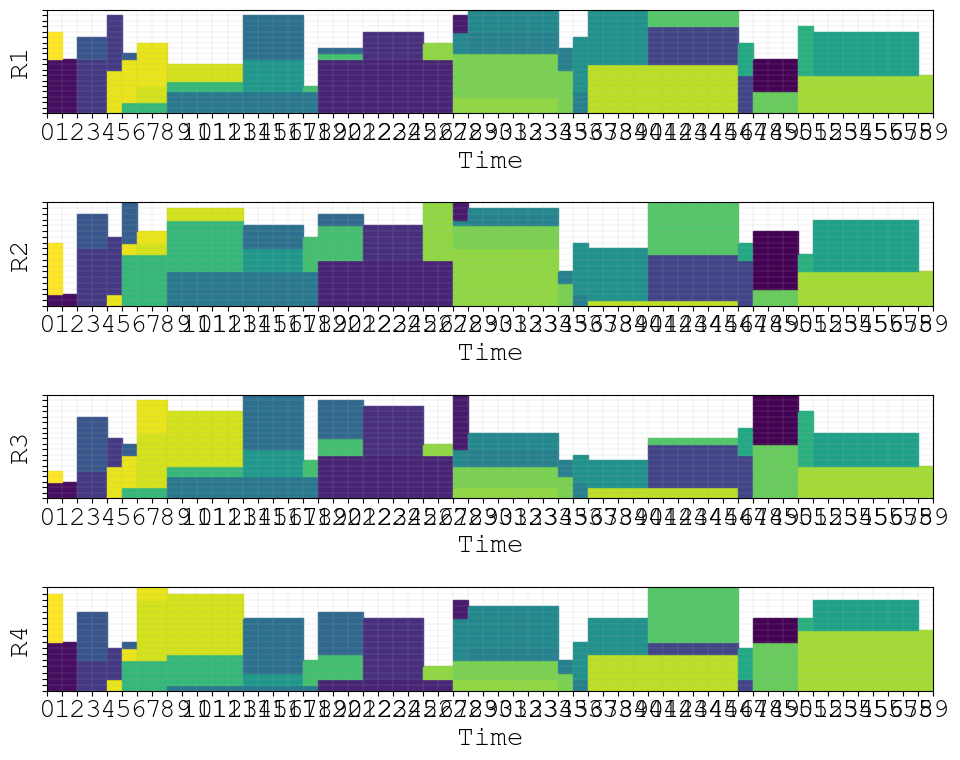

In [11]:
best_solution.plot()

In [10]:
# solutions = []
# for p in problems:
#     abc = ArtificialBeeColony(psmodel=p)
#     h = abc.optimize(params=params)
#     solutions.append(h)


In [11]:
# diff = []
# for i, sol in enumerate(solutions):
#     diff.append(sol.get_makespan() - optimal[i])

In [12]:
# print('ARPD:', sum(diff)*100/len(diff))
# print('optimal found in', len(list(filter(lambda x: x == 0, diff))), 'out of', len(diff))